In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
# import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
 os.chdir("/content/drive/My Drive/Utils")

In [0]:
from torchvision import transforms
from helper import HelperModel
from dataset_info import DataSetInfo
from dataloader import DataLoader
from model import Cifar
from transforms import Transform
from train import Train
from test import Test
from plot import Plot
from tqdm import tqdm

### Create model and display summary

In [6]:

model_obj = Cifar()

device = HelperModel.get_device()

model = model_obj.to(device)

#create object for helper with object
helper_obj = HelperModel(model)

#display summaru of model
helper_obj.display_model_summay(model, (3, 32, 32))



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
         Dropout2d-4           [-1, 32, 32, 32]               0
            Conv2d-5          [-1, 128, 32, 32]          36,864
       BatchNorm2d-6          [-1, 128, 32, 32]             256
              ReLU-7          [-1, 128, 32, 32]               0
         Dropout2d-8          [-1, 128, 32, 32]               0
         MaxPool2d-9          [-1, 128, 16, 16]               0
           Conv2d-10           [-1, 32, 16, 16]           4,096
      BatchNorm2d-11           [-1, 32, 16, 16]              64
             ReLU-12           [-1, 32, 16, 16]               0
        Dropout2d-13           [-1, 32, 16, 16]               0
           Conv2d-14           [-1, 64,

### Get data set object

In [0]:
data_set_obj = DataSetInfo("cifa", "./data")

### Get the train test transforms 

In [0]:

transform_obj = Transform(mean=0.5, std=0.5)
train_transforms = transform_obj.train_transforms
test_transforms = transform_obj.test_transforms

### Get Train and Test data set

In [9]:
train_set = data_set_obj.get_train_dataset(train_transforms)
test_set = data_set_obj.get_test_dataset(test_transforms)

Files already downloaded and verified
Files already downloaded and verified


### Load the train and test data

In [10]:
data_loader_obj = DataLoader(train_set, test_set, batch_size=64)
train_loader = data_loader_obj.train_loader
test_loader = data_loader_obj.test_loader

CUDA Available? True


### Show some training images

plane dog deer deer truck cat truck truck cat cat plane horse plane dog dog deer car car frog car frog dog ship cat car frog deer bird deer bird cat horse car cat cat ship horse plane plane plane truck plane frog horse ship deer bird plane cat dog bird truck dog cat deer dog dog frog horse frog ship deer plane truck


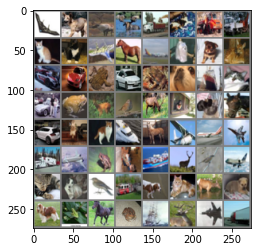

In [11]:
import torchvision
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
#get some random training images
iter_train_loader = iter(train_loader)
images, labels = iter_train_loader.next()
# show images
Plot.image_show(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%3s' % classes[labels[j]] for j in range(64)))

### Run the model

In [12]:
# optimizer = helper_obj.get_l2_regularizer()
optimizer = helper_obj.get_optimizer()
EPOCHS = 21
l1_factor=0.0001

train_obj = Train()
test_obj = Test()
train_max_acc = []
train_min_loss = []
for epoch in range(1, EPOCHS):
    print("EPOCH:", epoch)
    # train_obj.train(model, device, train_loader, optimizer, l1_factor=l1_factor)
    train_obj.train(model, device, train_loader, optimizer)
    test_obj.test(model, device, test_loader, misclassfied_required=True)
    train_max_acc.append(train_obj.train_acc[-1])
    train_min_loss.append(train_obj.train_losses[-1])
miscassified_images = test_obj.misclassified_images
test_losses = test_obj.test_losses
test_acc = test_obj.test_acc
print("Maximum Training Accuracy = ", max(train_max_acc))
print("Maximum Testing Accuracy = ", max(test_acc))




  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 1


Train Set: Train Loss=2.080836534500122 Batch_id=781 Accuracy=36.29: 100%|██████████| 782/782 [00:34<00:00, 22.84it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.2854, Accuracy: 5371/10000 (53.71%)

EPOCH: 2


Train Set: Train Loss=1.3274234533309937 Batch_id=781 Accuracy=50.28: 100%|██████████| 782/782 [00:33<00:00, 23.04it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.0836, Accuracy: 6063/10000 (60.63%)

EPOCH: 3


Train Set: Train Loss=1.2698757648468018 Batch_id=781 Accuracy=56.25: 100%|██████████| 782/782 [00:33<00:00, 23.12it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.9360, Accuracy: 6681/10000 (66.81%)

EPOCH: 4


Train Set: Train Loss=1.7777234315872192 Batch_id=781 Accuracy=60.80: 100%|██████████| 782/782 [00:34<00:00, 22.95it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8654, Accuracy: 6939/10000 (69.39%)

EPOCH: 5


Train Set: Train Loss=1.3209105730056763 Batch_id=781 Accuracy=63.67: 100%|██████████| 782/782 [00:33<00:00, 23.15it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8094, Accuracy: 7159/10000 (71.59%)

EPOCH: 6


Train Set: Train Loss=1.2913743257522583 Batch_id=781 Accuracy=66.36: 100%|██████████| 782/782 [00:34<00:00, 22.70it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7381, Accuracy: 7424/10000 (74.24%)

EPOCH: 7


Train Set: Train Loss=1.146632432937622 Batch_id=781 Accuracy=68.08: 100%|██████████| 782/782 [00:34<00:00, 22.88it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7044, Accuracy: 7579/10000 (75.79%)

EPOCH: 8


Train Set: Train Loss=0.8195822238922119 Batch_id=781 Accuracy=70.13: 100%|██████████| 782/782 [00:34<00:00, 22.84it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6623, Accuracy: 7735/10000 (77.35%)

EPOCH: 9


Train Set: Train Loss=0.338492214679718 Batch_id=781 Accuracy=71.42: 100%|██████████| 782/782 [00:34<00:00, 22.99it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6405, Accuracy: 7840/10000 (78.40%)

EPOCH: 10


Train Set: Train Loss=0.5806785225868225 Batch_id=781 Accuracy=72.85: 100%|██████████| 782/782 [00:34<00:00, 22.82it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6219, Accuracy: 7913/10000 (79.13%)

EPOCH: 11


Train Set: Train Loss=0.42188122868537903 Batch_id=781 Accuracy=73.79: 100%|██████████| 782/782 [00:34<00:00, 22.94it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5871, Accuracy: 8004/10000 (80.04%)

EPOCH: 12


Train Set: Train Loss=0.26003706455230713 Batch_id=781 Accuracy=75.18: 100%|██████████| 782/782 [00:34<00:00, 22.86it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5822, Accuracy: 8042/10000 (80.42%)

EPOCH: 13


Train Set: Train Loss=0.7480096817016602 Batch_id=781 Accuracy=75.67: 100%|██████████| 782/782 [00:34<00:00, 22.80it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5557, Accuracy: 8118/10000 (81.18%)

EPOCH: 14


Train Set: Train Loss=0.9644067883491516 Batch_id=781 Accuracy=76.77: 100%|██████████| 782/782 [00:34<00:00, 22.87it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5415, Accuracy: 8201/10000 (82.01%)

EPOCH: 15


Train Set: Train Loss=0.9864678382873535 Batch_id=781 Accuracy=77.15: 100%|██████████| 782/782 [00:34<00:00, 22.87it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5359, Accuracy: 8192/10000 (81.92%)

EPOCH: 16


Train Set: Train Loss=0.6389594078063965 Batch_id=781 Accuracy=78.04: 100%|██████████| 782/782 [00:34<00:00, 22.81it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5260, Accuracy: 8255/10000 (82.55%)

EPOCH: 17


Train Set: Train Loss=0.2835978865623474 Batch_id=781 Accuracy=78.84: 100%|██████████| 782/782 [00:34<00:00, 22.94it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5133, Accuracy: 8326/10000 (83.26%)

EPOCH: 18


Train Set: Train Loss=0.41192400455474854 Batch_id=781 Accuracy=79.27: 100%|██████████| 782/782 [00:34<00:00, 22.86it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5142, Accuracy: 8285/10000 (82.85%)

EPOCH: 19


Train Set: Train Loss=0.435758501291275 Batch_id=781 Accuracy=79.63: 100%|██████████| 782/782 [00:34<00:00, 22.90it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5052, Accuracy: 8311/10000 (83.11%)

EPOCH: 20


Train Set: Train Loss=0.8309826850891113 Batch_id=781 Accuracy=80.39: 100%|██████████| 782/782 [00:34<00:00, 22.81it/s]



Test set: Average loss: 0.5019, Accuracy: 8328/10000 (83.28%)

Maximum Training Accuracy =  80.39
Maximum Testing Accuracy =  83.28


### Display graphs

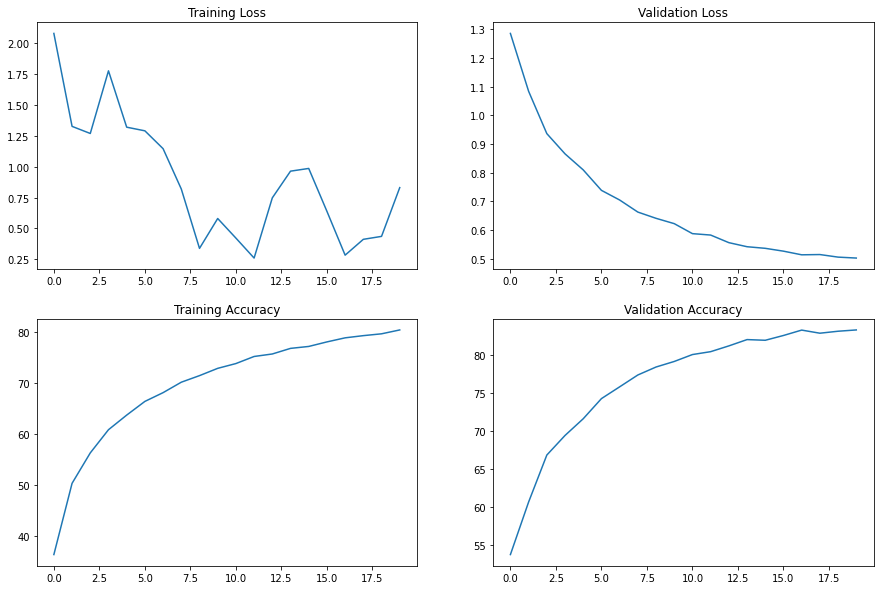

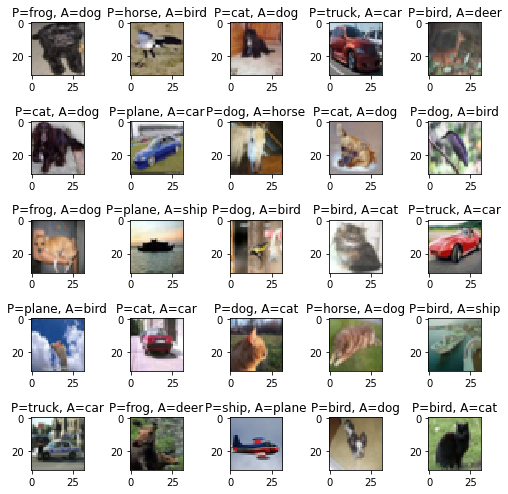

In [13]:
plt_obj = Plot(train_max_acc, train_min_loss, test_acc, test_losses)
# Plot all graph
plt_obj.display_all_plot()
# # plot train accuracy graph
# plt_obj.plot_train_graph()
# #plot train loss graph
# plt_obj.plot_train_graph(plot_case="Loss")
# #plot validation accuracy graph
# plt_obj.plot_validation_graph()
# #plot validation loss graph
# plt_obj.plot_validation_graph(plot_case="Loss")
# # plot 25 misclassified images
plt_obj.plot_cifar_misclassified(miscassified_images)